In [104]:
import datetime
from datetime import date,timedelta
import yfinance as yf
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

In [105]:
today = date.today()
today

datetime.date(2024, 1, 14)

In [106]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
end_date

'2024-01-14'

In [107]:
d2 = date.today() - timedelta(days=10000)
d2

datetime.date(1996, 8, 28)

In [108]:
d2 = d2.strftime("%Y-%m-%d")
start_date = d2
start_date

'1996-08-28'

In [109]:
data = yf.download(
    'NFLX',
    start=start_date,
    end=end_date,
    progress=False
)

In [110]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...
2024-01-08,473.890015,485.239990,473.649994,485.029999,485.029999,3675800
2024-01-09,475.529999,485.089996,473.799988,482.089996,482.089996,3526800
2024-01-10,481.600006,487.000000,472.950012,478.329987,478.329987,4342400


In [111]:
data['date'] = data.index
data

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002-05-23
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002-05-24
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,2002-05-28
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,2002-05-29
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,2002-05-30
...,...,...,...,...,...,...,...
2024-01-08,473.890015,485.239990,473.649994,485.029999,485.029999,3675800,2024-01-08
2024-01-09,475.529999,485.089996,473.799988,482.089996,482.089996,3526800,2024-01-09
2024-01-10,481.600006,487.000000,472.950012,478.329987,478.329987,4342400,2024-01-10


In [112]:
data = data[["date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data.tail()

,date,Open,High,Low,Close,Adj Close,Volume
5443,2024-01-08,473.890015,485.239990,473.649994,485.029999,485.029999,3675800
5444,2024-01-09,475.529999,485.089996,473.799988,482.089996,482.089996,3526800
5445,2024-01-10,481.600006,487.000000,472.950012,478.329987,478.329987,4342400
5446,2024-01-11,492.540009,503.410004,483.820007,492.230011,492.230011,7993300
5447,2024-01-12,500.510010,500.790009,490.609985,492.160004,492.160004,4996600


C:\Users\amith\Envs\workshop\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



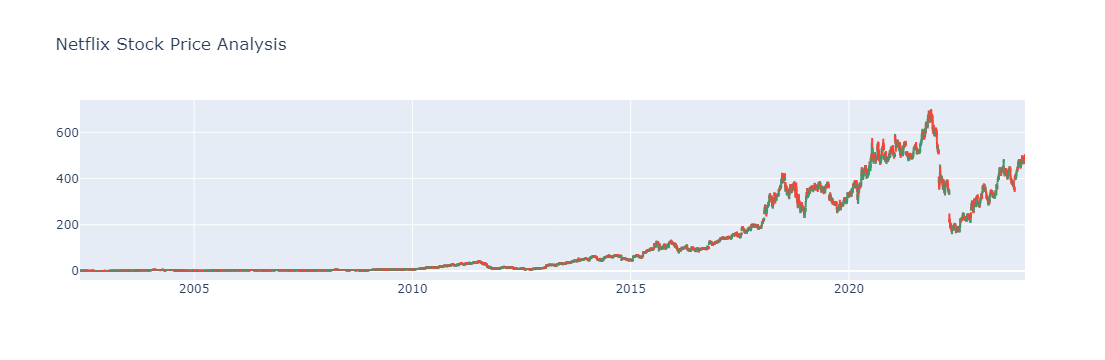

In [113]:
figure = go.Figure(
    data=[go.Candlestick(
    x=data['date'],
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Close']
)])
figure.update_layout(title = "Netflix Stock Price Analysis", 
                     xaxis_rangeslider_visible=False)
figure.show()

In [114]:
def get_day(text):
      date_obj = pd.to_datetime(str(text), format='%Y-%m-%d %H:%M:%S')
      day = date_obj.day
      return int(day)
def get_month(text):
      date_obj = pd.to_datetime(str(text), format='%Y-%m-%d %H:%M:%S')
      day = date_obj.month
      return int(day)
def get_year(text):
      date_obj = pd.to_datetime(str(text), format='%Y-%m-%d %H:%M:%S')
      day = date_obj.year
      return int(day)

data['day'] = data.date.apply(lambda x : get_day(x))
data['month'] = data.date.apply(lambda x : get_month(x))
data['year'] = data.date.apply(lambda x : get_year(x))

C:\Users\amith\AppData\Local\Temp\ipykernel_11432\456000938.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\amith\AppData\Local\Temp\ipykernel_11432\456000938.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\amith\AppData\Local\Temp\ipykernel_11432\456000938.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [115]:
data.head()

,date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,23,5,2002
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,24,5,2002
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,28,5,2002
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,29,5,2002
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,30,5,2002


In [116]:
data.corr()

,date,Open,High,Low,Close,Adj Close,Volume,day,month,year
date,1.000000,0.831888,0.832621,0.831481,0.832140,0.832140,-0.153666,-0.002070,0.007726,0.998952
Open,0.831888,1.000000,0.999850,0.999851,0.999678,0.999678,-0.286912,-0.003860,0.018007,0.830492
High,0.832621,0.999850,1.000000,0.999810,0.999857,0.999857,-0.285590,-0.003852,0.017598,0.831242
Low,0.831481,0.999851,0.999810,1.000000,0.999848,0.999848,-0.288325,-0.003606,0.018523,0.830060
Close,0.832140,0.999678,0.999857,0.999848,1.000000,1.000000,-0.286791,-0.003779,0.017886,0.830748
Adj Close,0.832140,0.999678,0.999857,0.999848,1.000000,1.000000,-0.286791,-0.003779,0.017886,0.830748
Volume,-0.153666,-0.286912,-0.285590,-0.288325,-0.286791,-0.286791,1.000000,0.033382,-0.049454,-0.151432
day,-0.002070,-0.003860,-0.003852,-0.003606,-0.003779,-0.003779,0.033382,1.000000,0.000980,-0.005939
month,0.007726,0.018007,0.017598,0.018523,0.017886,0.017886,-0.049454,0.000980,1.000000,-0.037895
year,0.998952,0.830492,0.831242,0.830060,0.830748,0.830748,-0.151432,-0.005939,-0.037895,1.000000


<Axes: >

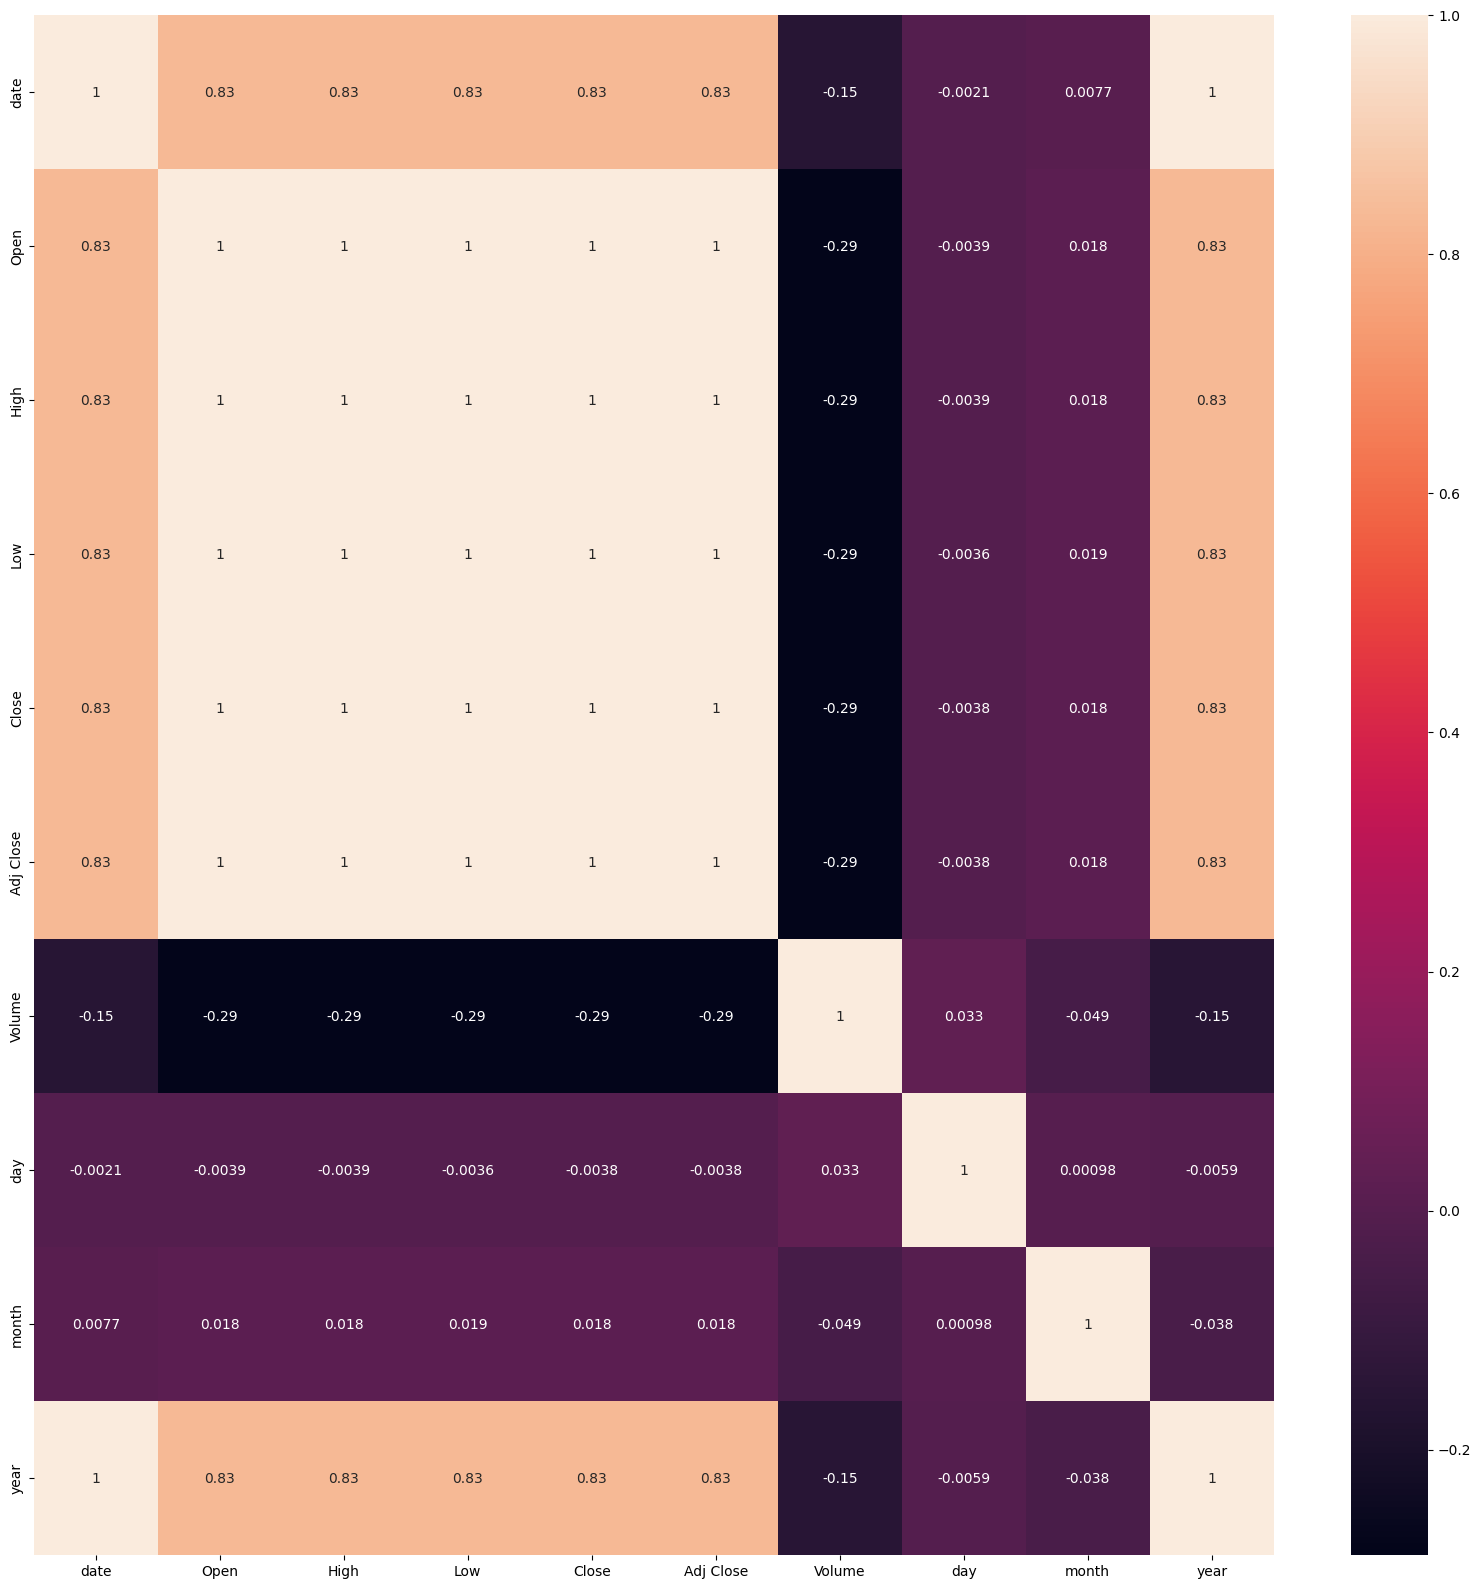

In [117]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

In [118]:
x = data[['Open','High','Low','Volume','day','month','year']]
y = data['Close']

X,y = np.array(x),np.array(y)
X,y

(array([[1.15642905e+00, 1.24285698e+00, 1.14571404e+00, ...,
         2.30000000e+01, 5.00000000e+00, 2.00200000e+03],
        [1.21428597e+00, 1.22500002e+00, 1.19714296e+00, ...,
         2.40000000e+01, 5.00000000e+00, 2.00200000e+03],
        [1.21357095e+00, 1.23214304e+00, 1.15714300e+00, ...,
         2.80000000e+01, 5.00000000e+00, 2.00200000e+03],
        ...,
        [4.81600006e+02, 4.87000000e+02, 4.72950012e+02, ...,
         1.00000000e+01, 1.00000000e+00, 2.02400000e+03],
        [4.92540009e+02, 5.03410004e+02, 4.83820007e+02, ...,
         1.10000000e+01, 1.00000000e+00, 2.02400000e+03],
        [5.00510010e+02, 5.00790009e+02, 4.90609985e+02, ...,
         1.20000000e+01, 1.00000000e+00, 2.02400000e+03]]),
 array([  1.19642901,   1.21000004,   1.157143  , ..., 478.32998657,
        492.23001099, 492.16000366]))

In [119]:
xscaler,yscaler = MinMaxScaler(),MinMaxScaler()
X,y = xscaler.fit_transform(X),yscaler.fit_transform(y.reshape(len(y),1))
X,y

(array([[0.00112515, 0.00118779, 0.00116557, ..., 0.73333333, 0.36363636,
         0.        ],
        [0.00120876, 0.0011623 , 0.00124057, ..., 0.76666667, 0.36363636,
         0.        ],
        [0.00120773, 0.0011725 , 0.00118224, ..., 0.9       , 0.36363636,
         0.        ],
        ...,
        [0.69543575, 0.69455278, 0.6891841 , ..., 0.3       , 0.        ,
         1.        ],
        [0.71124564, 0.71797626, 0.7050355 , ..., 0.33333333, 0.        ,
         1.        ],
        [0.72276345, 0.71423651, 0.71493713, ..., 0.36666667, 0.        ,
         1.        ]]),
 array([[0.00119131],
        [0.00121094],
        [0.00113448],
        ...,
        [0.69137173],
        [0.71147831],
        [0.71137704]]))

In [120]:
Xtrain,Xtest,ytrain,ytest = train_test_split(
    X,
    y,
    test_size=0.2
)

In [121]:
dr = DecisionTreeRegressor()

In [122]:
dr.fit(Xtrain,ytrain)

DecisionTreeRegressor()

In [123]:
y_pred = dr.predict(Xtest)

In [124]:
y_pred

array([0.03121991, 0.06136113, 0.12006687, ..., 0.22089304, 0.09794761,
       0.26175706])

In [125]:
mean_squared_error(ytest,y_pred)

2.2528725419252705e-05

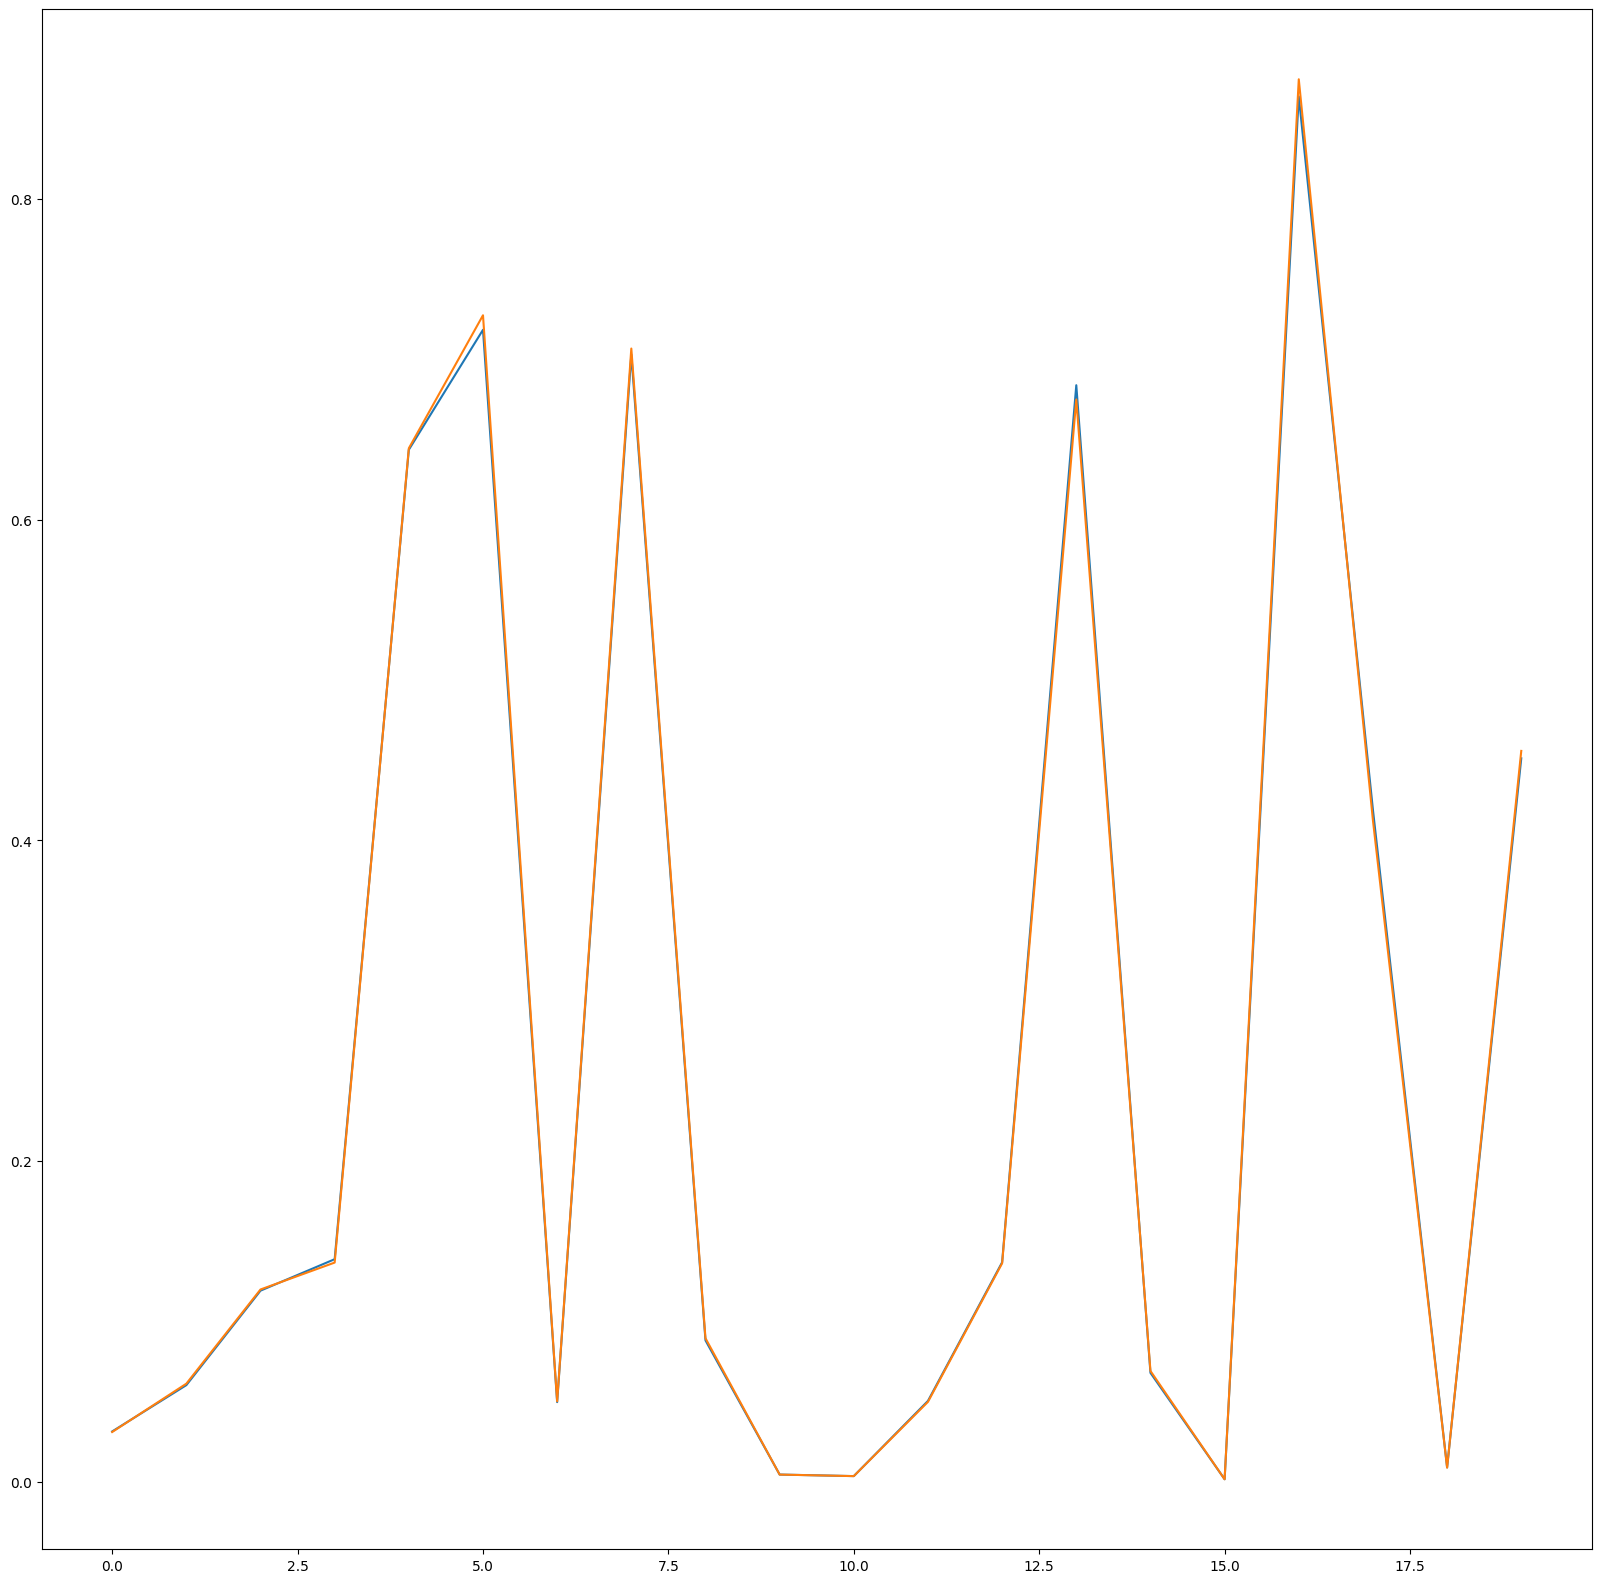

In [126]:
plt.figure(figsize=(20,20))
plt.plot(np.arange(0,len(ytest))[:20],ytest[:20])
plt.plot(np.arange(0,len(ytest))[:20],y_pred[:20])

In [127]:
rf = RandomForestRegressor()

In [128]:
rf.fit(Xtrain,ytrain.reshape(len(ytrain),))

RandomForestRegressor()

In [129]:
rf_pred = rf.predict(Xtest)

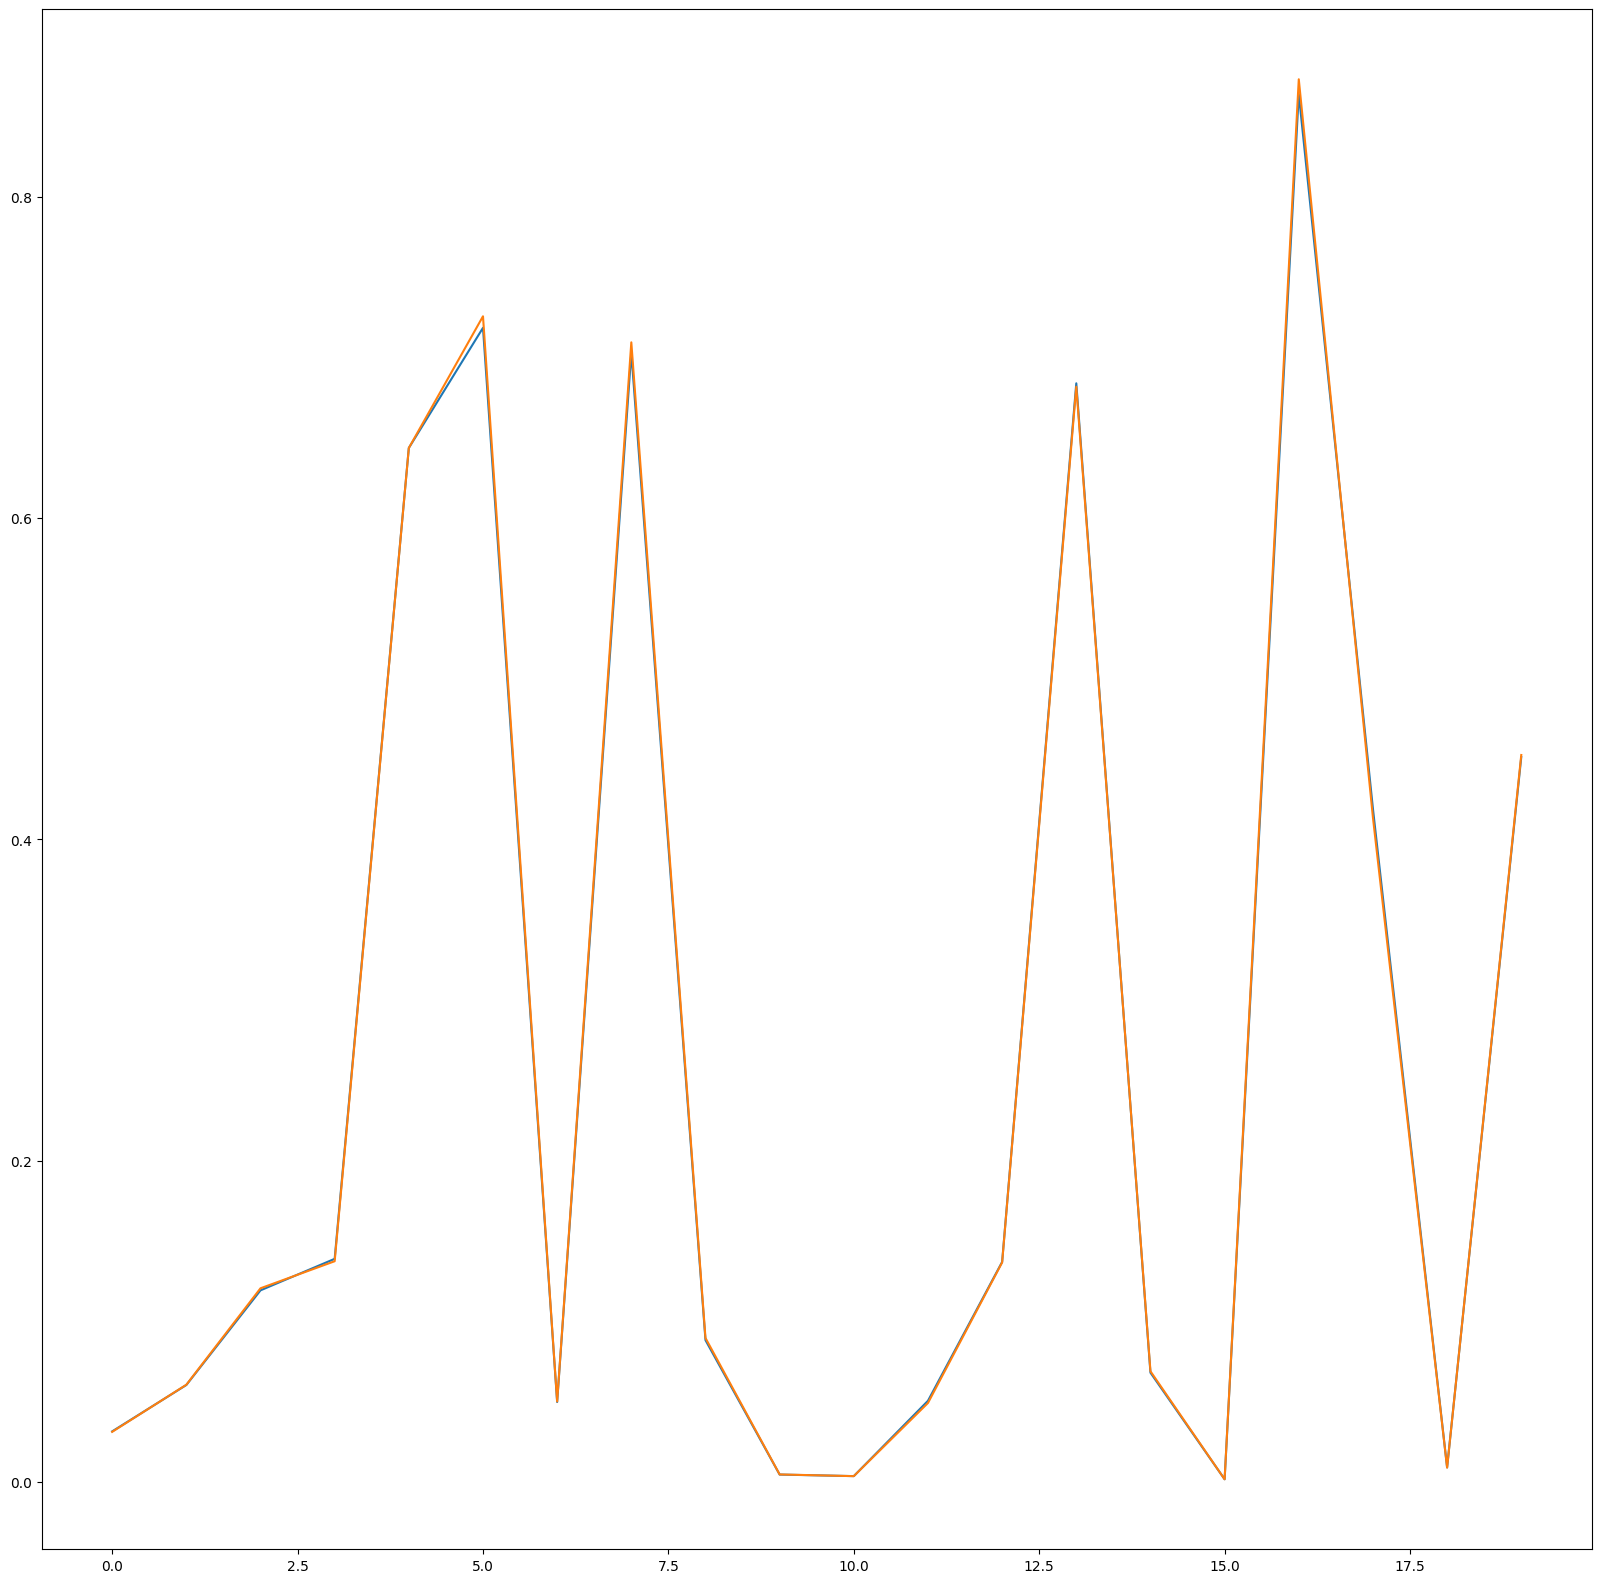

In [130]:
plt.figure(figsize=(20,20))
plt.plot(np.arange(0,len(ytest))[:20],ytest[:20])
plt.plot(np.arange(0,len(ytest))[:20],rf_pred[:20])